In [8]:
import os
import sys
import glob
import cv2
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import numpy as np

In [9]:

def drawFigure(loc, img, label):
    plt.subplot(*loc), plt.imshow(img, cmap='gray')
    plt.title(label), plt.xticks([]), plt.yticks([])

face01 = cv2.imread('faces_training/face01.pgm', cv2.IMREAD_GRAYSCALE)
face02 = cv2.imread('faces_training/face02.pgm', cv2.IMREAD_GRAYSCALE)
face03 = cv2.imread('faces_training/face03.pgm', cv2.IMREAD_GRAYSCALE)

wh = np.array(np.shape(face01))
print(wh)
print(np.shape(face01))

image = cv2.imread('faces_training/face01.pgm', cv2.IMREAD_GRAYSCALE)

length, height = face01.shape
image = image.reshape((1, length * height * 1))

for i in range(2,10):
    x = cv2.imread(f'faces_training/face0{i}.pgm', cv2.IMREAD_GRAYSCALE)
    temp = x.reshape((1, length * height * 1))
    image = np.concatenate([image, temp], axis=0)
    
for i in range(10,40):
    x = cv2.imread(f'faces_training/face{i}.pgm', cv2.IMREAD_GRAYSCALE)
    temp = x.reshape((1, length * height * 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=0)

# image = np.concatenate([x,y,z], axis=0)
print(image.shape)

[192 168]
(192, 168)
(39, 32256)


####### Step1 ####
현재 고유 값0 : 37254.77165671918
현재 고유 값1 : 4079.03252985013
현재 고유 값2 : 3095.0674060306465
현재 고유 값3 : 2814.357275833147
현재 고유 값4 : 2590.1419663099214
현재 고유 값5 : 2008.3373029306101
현재 고유 값6 : 1641.2676210540426
현재 고유 값7 : 1525.3515098329956
현재 고유 값8 : 1174.694377167604
현재 고유 값9 : 1101.0270501283164
현재 고유 값10 : 945.7783766377105
현재 고유 값11 : 906.3412825397879
현재 고유 값12 : 813.6297388294269
현재 고유 값13 : 736.0485112439512
현재 고유 값14 : 680.0404629371345
현재 고유 값15 : 639.701826577086
현재 고유 값16 : 582.8191182085255
현재 고유 값17 : 527.7661532207727
현재 고유 값18 : 481.88630687685855
현재 고유 값19 : 448.91355282495357
현재 고유 값20 : 420.7328420403262
현재 고유 값21 : 399.602522949724
현재 고유 값22 : 386.59266856546293
현재 고유 값23 : 366.9286591002731
현재 고유 값24 : 345.4862685526222
확률 :  0.9544373321743819
전체 차원 수  39
선택된 차원 수  25
Input Percentage: 0.95
Selected Dimansion : 25


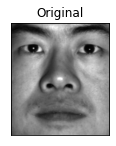

In [23]:
print("####### Step1 ####")
## face01 은 numpy array

drawFigure((1, 3, 1), face02, 'Original')

    
def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)

    [eigvals, eigvec] = np.linalg.eig(np.cov(img))
    
    whole_nom_of_pc = np.size(eigvec, axis=0)
    
    eigvals = sorted(eigvals)
    eigvals = eigvals[::-1]
    
    sumvar = 0
    ssum = 0
    numPc=0
    for i in range(whole_nom_of_pc):
        sumvar += eigvals[i]
        
    for i in range(whole_nom_of_pc):
        ssum += eigvals[i]
        numPc += 1
        print(f"현재 고유 값{i} : {eigvals[i]}")
        if(ssum/sumvar >= percent):
            print("확률 : ",ssum/sumvar)
            break
    
    print("전체 차원 수 ", whole_nom_of_pc)
    print("선택된 차원 수 ", numPc)    
    return numPc
    
perc = 0.95
numPc = computeDimensions(image, perc)
# print(f"nput Percentage: {sys.argv[1]}")
print(f"Input Percentage: {perc}")
print(f"Selected Dimansion : {numPc}")
    

In [157]:
def princomp(img, pc_limit=0):

    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)
    
    [eigvals,eigvecs] = np.linalg.eig(np.cov(matrix))
    
    whole_num_pc = np.size(eigvecs,axis=1)

    sortEigvals = sorted(eigvals) # 고유값을 정렬한다.
    sortEigvals = sortEigvals[::-1]       # in ascending order. 순서를 높은게 앞에 오도록 변경
    # sorting eigenvectors according to the sorted eigenvalues
    # 고유값이 정렬된 순서에 따라 대응하는 고유벡터들도 정렬한다.
    # coeff = coeff[:,sortEigvals]
    
    # eigvals = eigvals[sortEigvals] # sorting eigenvalues
    if pc_limit < whole_num_pc and pc_limit >= 0:
        eigvecs = eigvecs[:,range(pc_limit)] # 입력된 pc 개수에 따라 선택한다.
        eigvals = eigvals[:pc_limit]
        
    score = np.dot(eigvecs.T,matrix) # projection of the data in the new space
    final = np.dot(eigenvector, score).T + np.mean(img, axis=0)
    return eigvecs,score,eigvals, final

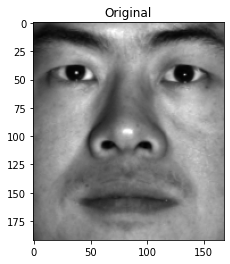

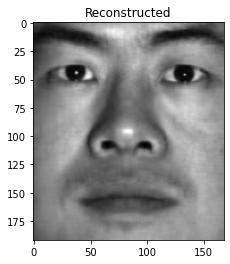

In [156]:
import pylab 
face02 = cv2.imread('faces_training/face02.pgm', cv2.IMREAD_GRAYSCALE)
    
eigenvector, score, eigenvalue = princomp(face02, numPc)

final = np.dot(eigenvector, score).T + np.mean(face02, axis=0)


plt.title("Original")
plt.imshow(face02, cmap='gray')
plt.show()

final_to_show = np.abs(final).astype(np.float)

plt.title("Reconstructed")
plt.imshow(np.abs(final), cmap='gray')
plt.show()

결과 고유벡터 :  (192, 25)
size : 25


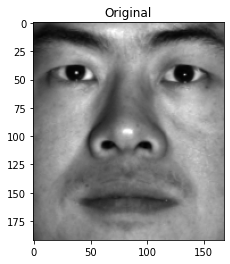

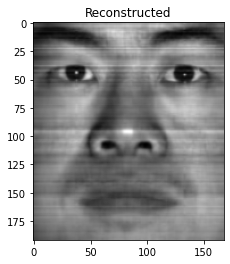

ValueError: operands could not be broadcast together with shapes (192,168) (168,25) 

In [131]:

eigenvector, score, eigenvalue = princomp(face02, numPc)
# eigenvalue = eigenvalue[:4]
print("결과 고유벡터 : ",eigenvector.shape)
img = (face02-np.mean(face02.T,axis=1)) # subtract the mean (along columns)

final = np.dot(eigenvector.T, img) # final dataset = featurevector.T * standarizedOriginalData
# final = np.dot(eigenvector.T, img).T + np.mean(face02)
final = final.T

f = np.dot(eigenvector,score).T + np.mean(face02) # image reconstruction

# print(f"고유 벡터 : \n {eigenvector}\n")
print("size :",np.size(eigenvalue))

plt.title("Original")
plt.imshow(face02, cmap='gray')
plt.show()

final_to_show = np.abs(final).astype(np.float)

plt.title("Reconstructed")
plt.imshow(np.abs(f.T), cmap='gray')
plt.show()

error = face02 - final
row, col = error.shape
summ = 0
for i in range(row):
    for j in range(col):
        s = error[i][j]*error[i][j]
        summ += s # 전체 합.

re_error = np.abs(summ/(row*col)) # 전체합을 n으로 나누고 복소수를 float으로 전환
print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐


In [159]:
final_list = []

for n in range(1,10):
    train = cv2.imread(f'faces_training/face0{n}.pgm', cv2.IMREAD_GRAYSCALE)
    
    img = (train-np.mean(train.T,axis=1)) # subtract the mean (along columns)
    
    eigenvector, score, eigenvaluen, final = princomp(train, numPc)
    final = np.abs(final)
    final_list.append(final)
    
for n in range(10,40):
    train = cv2.imread(f'faces_training/face{n}.pgm', cv2.IMREAD_GRAYSCALE)
    
    img = (train-np.mean(train.T,axis=1)) # subtract the mean (along columns)
    
    eigenvector, score, eigenvalue,final = princomp(train, numPc)
    
    final = np.abs(final)
    final_list.append(final)
    
# final_list[0] 은 face01의 리컨스트럭션 이미지다.

In [165]:
test01 = cv2.imread('faces_test/test05.pgm', cv2.IMREAD_GRAYSCALE)
print(len(final_list))
print(final_list[0].shape)

row, col = test01.shape
distances = []
for n in range(39): 
    sum_of=0
    for r in range(row):
        for c in range(col):
            sum_of += (test01[r][c]-final_list[n][r][c])**2
    distances.append(np.sqrt(sum_of))

print(distances)
found = distances.index(min(distances)) + 1
print(found)



39
(192, 168)
[12435.555387670394, 13571.154501232915, 15873.035822322729, 8372.2729650092, 14826.910150058484, 13533.824034470172, 9482.019095184503, 7159.7076794846225, 7297.529041875987, 15648.007493248811, 12393.889911960207, 11783.813582219344, 7118.75024723978, 19157.952778441126, 11180.50433883922, 13617.233696137891, 12034.6823709566, 10210.97221017457, 8006.477826608134, 6368.852180171385, 10535.273602963436, 8725.85754343265, 11402.807962915069, 10824.924831236993, 12364.9281982165, 13522.637060328583, 16439.311040024004, 14784.684244185777, 14578.20518516586, 6119.6000929352485, 9640.674192067545, 10828.138531670194, 7105.544314784855, 10944.39779041454, 8342.73024761902, 13076.59214069212, 10683.849132185738, 9153.315952021649, 9974.02511381555]
30


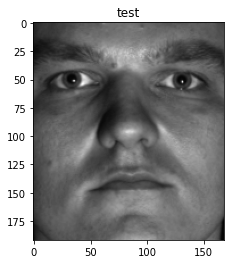

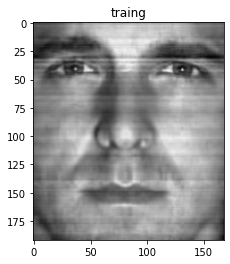

In [126]:

fff = cv2.imread(f'faces_training/face0{found}.pgm', cv2.IMREAD_GRAYSCALE)

plt.title("test")
plt.imshow(test01, cmap='gray')
plt.show()

final_to_show = np.abs(final).astype(np.float)

plt.title("traing")
plt.imshow(final_list[9], cmap='gray')
plt.show()

In [166]:
lists = [1,2,3,4]
print(sum(lists))

10


In [ ]:
# print(f"image :\n {face01} \n")

matrix = (face01 - np.mean(face01.T, axis=1)).T

# print(f"matrix : \n{matrix}\n")
# print(f" \n 평균 : \n{np.mean(matrix)}\n")

# Covariance matrix의 고유값과 고유벡터 구함. 이전에 전처리를 안해줬다.
eigenvalue, eigvector = np.linalg.eig(np.cov(matrix))

eigenvalue = np.round(eigenvalue, 5) # 소수점 5째 자리로 반올림
eigvector = np.round(eigvector, 5) # 소수점 5째 자리로 반올림

